### Chapter 12: Additional Problems in Image Processing

#### Import Required Libraries
Import the necessary libraries, including TensorFlow, Keras, and scikit-learn.

In [75]:
# Import Required Libraries
# type: ignore
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import numpy as np
import glob
import os
import cv2
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk

#### Load and Split Data
Load the dataset and split it into training and testing sets using train_test_split.

In [76]:
path = 'dataset'
images = []
labels = []

# Load ripe tomatoes images
for file in glob.glob(os.path.join(path, 'Images', 'Riped tomato_*.jpeg')):
    img = cv2.imread(file)
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(1)  # label 1 for ripe tomatoes

# Load unripe tomatoes images
for file in glob.glob(os.path.join(path, 'Images', 'unriped tomato_*.jpeg')):
    img = cv2.imread(file)
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(0)  # label 0 for unripe tomatoes

# Convert to numpy arrays and normalize images to 0-1 range
images = np.array(images) / 255.0
labels = np.array(labels)

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

#### Create the Model
Define a function to create a Keras Sequential model with Conv2D, MaxPooling2D, Flatten, and Dense layers.

In [77]:
# Create the Model
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model()
model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       394,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395,169 (1.51 MB)

 Trainable params: 395,169 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the Model
Define a function to train the model using the fit method and save the trained model.

In [78]:
# Train the Model
def train_model(model, train_data, train_labels, test_data, test_labels):
    history = model.fit(train_data, train_labels, epochs=32, validation_data=(test_data, test_labels))
    
    # Save the model
    model.save('tomato_model_1.h5')
    
    return model

# Train the model
trained_model = train_model(model, train_data, train_labels, test_data, test_labels)

Epoch 1/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.5417 - loss: 3.8122 - val_accuracy: 0.5714 - val_loss: 2.9609
Epoch 2/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.6638 - loss: 1.8870 - val_accuracy: 0.8929 - val_loss: 0.4488
Epoch 3/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.8264 - loss: 0.6328 - val_accuracy: 0.9286 - val_loss: 0.2518
Epoch 4/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.9326 - loss: 0.2924 - val_accuracy: 0.9286 - val_loss: 0.3182
Epoch 5/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9656 - loss: 0.1171 - val_accuracy: 0.8929 - val_loss: 0.3541
Epoch 6/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.9832 - loss: 0.0527 - val_accuracy: 0.9286 - val_loss: 0.1960
Epoch 7/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9935 - loss: 0.0164 - val_accuracy: 0.9286 - val_loss: 0.1914
Epoch 8/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9916 - loss: 0.0179 - val_accuracy: 0.9464 - val_loss:

#### Evaluate the Model
Define a function to evaluate the model on the test data and print the test loss and accuracy.

In [79]:
# Evaluate the Model
def evaluate_model(model, test_data, test_labels):
    loss, accuracy = model.evaluate(test_data, test_labels)
    print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Evaluate the trained model
evaluate_model(trained_model, test_data, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9435 - loss: 0.1428
Test loss: 0.14301010966300964, Test accuracy: 0.9464285969734192


#### Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


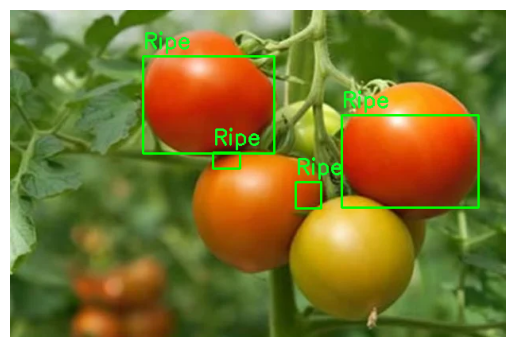

In [81]:
model = load_model('tomato_model_1.h5')

def detect_ripe_tomatoes(image, model):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, np.array([0, 100, 100]), np.array([10, 255, 255]))
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            tomato = cv2.resize(image[y:y+h, x:x+w], (224, 224)) / 255.0 
            tomato = np.expand_dims(tomato, axis=0)
            prediction = model.predict(tomato)[0][0]
            label = "Ripe" if prediction > 0.5 else "Unripe"
            
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return image

image_path = 'test_image/4.png'

# Read the image
image = cv2.imread(image_path)
if image is not None:
    result_image = detect_ripe_tomatoes(image, model)
    result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    plt.imshow(result_image_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Error: Couldn't load the image.")


In [83]:
# Load the trained model
model = load_model('tomato_model_1.h5')

def detect_ripe_tomatoes(frame, model):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            tomato = frame[y:y+h, x:x+w]
            tomato = cv2.resize(tomato, (224, 224))
            tomato = tomato / 255.0
            tomato = np.expand_dims(tomato, axis=0)
            prediction = model.predict(tomato)[0][0]
            label = "Ripe" if prediction > 0.5 else "Unripe"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.imshow("Ripe Tomato Detection", frame)

def open_file():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.bmp")])
    if file_path:
        image = cv2.imread(file_path)
        if image is None:
            messagebox.showerror("Error", "Failed to load image.")
            return
        detect_ripe_tomatoes(image, model)
    else:
        messagebox.showinfo("No file", "No file was selected.")

# Create a basic Tkinter window for the GUI
root = tk.Tk()
root.title("Tomato Ripe Detection")
root.geometry("500x300")
root.config(bg="#f0f0f0")  # Light gray background

# Frame to hold the content
frame = tk.Frame(root, bg="#f0f0f0")
frame.pack(pady=20)

# Title label with custom font
title_label = tk.Label(frame, text="Tomato Ripe Detection", font=("Helvetica", 18, "bold"), bg="#f0f0f0")
title_label.pack(pady=10)

# Instruction label
instruction_label = tk.Label(frame, text="Select an image to detect ripe tomatoes:", font=("Helvetica", 12), bg="#f0f0f0")
instruction_label.pack(pady=5)

# Open button with custom design
open_button = tk.Button(frame, text="Open Image", command=open_file, font=("Helvetica", 12), bg="#4CAF50", fg="white", relief="flat", padx=20, pady=10)
open_button.pack(pady=20)

# Add a footer label with some info
footer_label = tk.Label(root, text="Powered by Tomato Ripe Detection System", font=("Helvetica", 10), bg="#f0f0f0", fg="#888888")
footer_label.pack(side="bottom", pady=10)

root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
